In [1]:
from griblib import HARMONIE
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import xarray as xr

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%config Completer.use_jedi = False
%matplotlib inline
import matplotlib.pylab as plt
plt.rcParams['figure.dpi'] = 125

In [4]:
# plotting parameters
temp_lim = {'min': -20.0, 'max': 20.0}
#temp_lim = {'min': -50.0, 'max': 0.0}
wind_lim = {'min': 5.0, 'max': 20.0}
z_lim = {'min': 0.0, 'max': 6.0, 'dz': 1.0}

# parameters for great circle path
path_params = dict()
path_params['type'] = 'range-azimuth'
path_params['start'] = dict(lat=51.0, lon=0.0)
#path_params['end'] = dict(lat=54.0, lon=9.0)
path_params['range'] = 700.0e3
path_params['azimuth'] = 60.0
dr = 1.0e3

In [5]:
#fid_grib = 'cy36/20170529_00/HARM_N25_201705290000_00300_GB'
fid_grib = 'cy36/20170529_03/HARM_N25_201705290300_00100_GB'
#fid_grib = 'cy36/20170529_06/HARM_N25_201705290600_00000_GB'

#fid_grib = 'cy38/20170529_00/HA38_N25_201705290000_00400_GB'
#fid_grib = 'cy38_haratu/20170529_00/HA38_N25_201705290000_00400_GB'

In [6]:
my_atmos = HARMONIE(cycle=36)

In [7]:
request = [
    {'level_type': 'hybrid', 'var_list': ['z', 't', 'u', 'v', 'q', 'pdep', 'tke']},
    {'level_type': 'heightAboveGround', 'var_list': ['mld', 'ugst', 'vgst']},
    {'level_type': 'heightAboveGround', 'var_list': ['pres'], 'level': 0},
]

if my_atmos.cycle == 36:
    request.append({'level_type': 'hybrid', 'var_list': ['lsp', 'w']})
else:
    request.append({'level_type': 'hybrid', 'var_list': ['rain']})
    
ds = my_atmos.read_grib(fid_grib, request, compat='override')

ds_mslp = my_atmos.read_grib(fid_grib, [{'level_type': 'heightAboveSea'}])

ds = xr.merge([ds_mslp.rename({'pres':'pres_msl'}), ds])
del(ds_mslp)

if my_atmos.cycle == 36:
    ds = ds.rename(p3067='mld')
    ds = ds.rename(p3062='rain')

********************************************************************************
Reading HARMONIE cy36 GRIB file [ cy36/20170529_03/HARM_N25_201705290300_00100_GB ]

Reading GRIB PV coefficients
Reading z on hybrid level
Reading t on hybrid level
Reading u on hybrid level
Reading v on hybrid level
Reading q on hybrid level
Reading pdep on hybrid level
Reading tke on hybrid level
Reading mld on heightAboveGround level
Reading ugst on heightAboveGround level
Reading vgst on heightAboveGround level
Reading pres on heightAboveGround level (level 0)
Reading lsp on hybrid level
Reading w on hybrid level
********************************************************************************
Reading HARMONIE cy36 GRIB file [ cy36/20170529_03/HARM_N25_201705290300_00100_GB ]

Reading GRIB PV coefficients
Reading all variables on heightAboveSea level


In [8]:
ds

<xarray.Dataset>
Dimensions:            (hybrid: 60, latitude: 300, longitude: 300)
Coordinates:
    time               datetime64[ns] 2017-05-29T03:00:00
    step               timedelta64[ns] 01:00:00
    heightAboveSea     int64 ...
  * latitude           (latitude) float64 49.0 49.02 49.05 ... 55.83 55.85 55.88
  * longitude          (longitude) float64 0.0 0.037 0.074 ... 10.99 11.03 11.06
    valid_time         datetime64[ns] 2017-05-29T04:00:00
  * hybrid             (hybrid) int64 1 2 3 4 5 6 7 8 ... 54 55 56 57 58 59 60
    heightAboveGround  int64 ...
Data variables:
    pres_msl           (latitude, longitude) float32 ...
    z                  (hybrid, latitude, longitude) float32 ...
    t                  (hybrid, latitude, longitude) float32 ...
    u                  (hybrid, latitude, longitude) float32 ...
    v                  (hybrid, latitude, longitude) float32 ...
    q                  (hybrid, latitude, longitude) float32 ...
    pdep               (hybrid, latitude, longitude) float32 ...
    tke                (hybrid, latitude, longitude) float32 ...
    mld                (latitude, longitude) float32 ...
    ugst               (latitude, longitude) float32 ...
    vgst               (latitude, longitude) float32 ...
    pres               (latitude, longitude) float32 ...
    rain               (hybrid, latitude, longitude) float32 ...
    w                  (hybrid, latitude, longitude) float32 ...

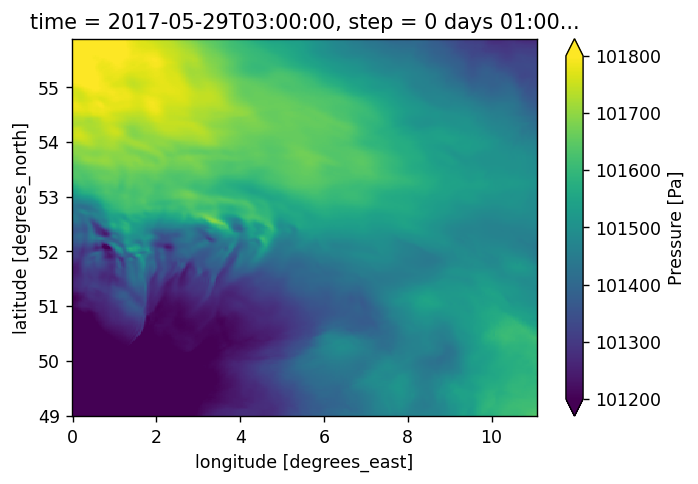

In [9]:
ds.pres_msl.plot(vmin=1012e2,vmax=1018e2)

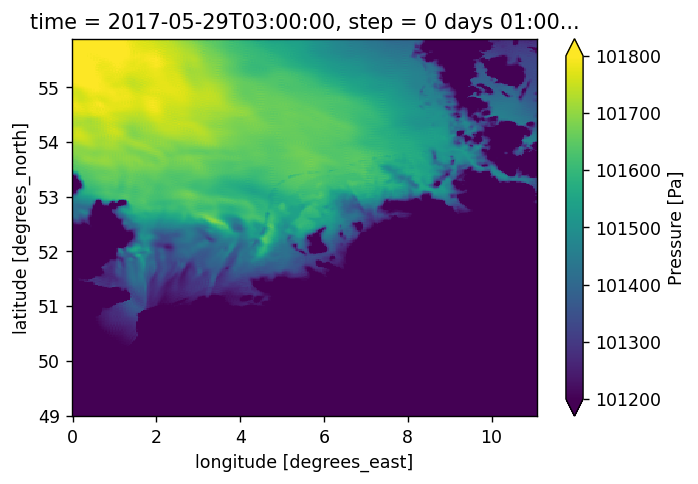

In [10]:
ds.pres.plot(vmin=1012e2,vmax=1018e2)

In [11]:
t_fcst = (ds.valid_time).dt.strftime('%Y%m%d-%H').values

In [12]:
ds_gcp = my_atmos.extract_gcp_slice(ds, path_params, dr=dr)

In [13]:
ds_gcp

<xarray.Dataset>
Dimensions:            (distance: 702, hybrid: 60)
Coordinates:
    time               datetime64[ns] 2017-05-29T03:00:00
    step               timedelta64[ns] 01:00:00
    heightAboveSea     int64 0
    valid_time         datetime64[ns] 2017-05-29T04:00:00
  * hybrid             (hybrid) int64 1 2 3 4 5 6 7 8 ... 54 55 56 57 58 59 60
    heightAboveGround  int64 0
    longitude          (distance) float64 0.0 0.01232 0.02464 ... 9.208 9.222
    latitude           (distance) float64 51.0 51.0 51.01 ... 53.79 53.8 53.8
  * distance           (distance) float64 0.0 998.6 1.997e+03 ... 6.99e+05 7e+05
    azimuth            (distance) float64 59.99 60.0 60.01 ... 67.28 67.29 67.3
Data variables:
    pres_msl           (distance) float64 1.012e+05 1.012e+05 ... 1.015e+05
    z                  (hybrid, distance) float64 -999.0 -999.0 ... 111.0 111.6
    t                  (hybrid, distance) float64 230.6 230.5 ... 286.9 286.9
    u                  (hybrid, distance) float64 -7.083 -7.107 ... 2.616 2.649
    v                  (hybrid, distance) float64 -5.059 -5.076 ... -2.329
    q                  (hybrid, distance) float64 3.245e-05 ... 0.009185
    pdep               (hybrid, distance) float64 0.005953 0.006689 ... 0.4765
    tke                (hybrid, distance) float64 1e-06 1e-06 ... 0.3651 0.3628
    mld                (distance) float64 96.32 96.35 96.37 ... 391.2 414.0
    ugst               (distance) float64 -6.095 -5.619 -5.068 ... 5.577 5.618
    vgst               (distance) float64 -5.516 -5.938 -6.329 ... -1.876 -1.839
    pres               (distance) float64 1.007e+05 1.006e+05 ... 1.015e+05
    rain               (hybrid, distance) float64 8.447e-24 ... 5.717e-08
    w                  (hybrid, distance) float64 -0.4441 -0.4882 ... -0.002127

In [14]:
# Temperature (in degrees Celcius)
temperature = ds_gcp['t'].squeeze() - 273.15
#temperature -= temperature.mean(dim='distance')
temperature.attrs= {'long_name': 'temperature',
                    'units' : 'deg C',
                    'standard_name': 'air_temperature'}

# Wind speed
windspeed = np.sqrt(ds_gcp.u**2+ds_gcp.v**2).squeeze()
#windspeed = windspeed.where(windspeed > 0.95*wind_lim['min'])
windspeed.attrs= {'long_name': 'wind speed',
                    'units' : 'm/s',
                    'standard_name': 'wind_speed'}

In [15]:
lons = ds_gcp.longitude.values
lats = ds_gcp.latitude.values
coord_str = '({slo:.1f}E,{sla:.1f}N) > ({elo:.1f}E,{ela:.1f}N)'.format(
    slo=lons[0], sla=lats[0], elo=lons[-1], ela=lats[-1])
title_str = '{model}{cycle} fcst {time} UT - gcp {coords}'.format(
    model=my_atmos.model, cycle=my_atmos.cycle, time=t_fcst, coords=coord_str)

Text(0.5, 0, 'Distance [m]')

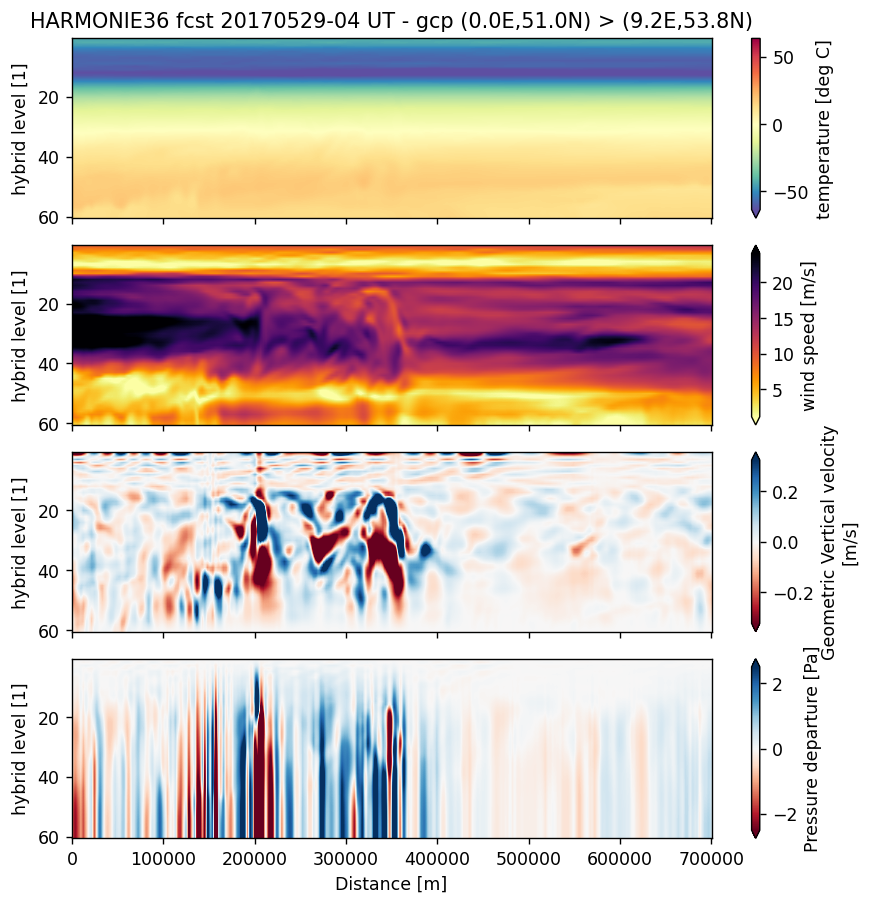

In [16]:
import matplotlib.colors as colors
n_plots = 4

fig, ax = plt.subplots(n_plots, 1, sharex=True, figsize=(8,8))
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.9, wspace=0.15, hspace=0.15)

temperature.plot.imshow(cmap='Spectral_r',
                        ax=ax[0],
                        robust=True,
#                         vmin=temp_lim['min'], vmax=temp_lim['max'],
                        origin='upper',
                        interpolation='bilinear')

windspeed.plot.imshow(cmap='inferno_r', 
                      ax=ax[1],
                      robust=True,
#                       vmin=wind_lim['min'], vmax=wind_lim['max'],
                      origin='upper',
                      interpolation='bilinear')

ds_gcp['w'].plot.imshow(cmap='RdBu',
                        ax=ax[2],
                        robust=True,
#                         vmin=-0.2, vmax=0.2,
                        origin='upper',
                        interpolation='bilinear')

ds_gcp['pdep'].plot.imshow(cmap='RdBu',
                        ax=ax[3],
                        robust=True,
#                         vmin=-0.2, vmax=0.2,
                        origin='upper',
                        interpolation='bilinear')

for i in range(0,n_plots):
    ax[i].set_title('')
    ax[i].set_xlabel('')

ax[0].set_title(title_str)
ax[3].set_xlabel('Distance [m]')

In [17]:
# compute pressure, geopotential and geometric altitudes on model levels

(z, pres) = my_atmos.compute_altitude_pressure(t=ds_gcp.t,
                                               q=ds_gcp.q,
                                               ps=ds_gcp.pres,
                                               z0=ds_gcp.z.sel(hybrid=len(ds.hybrid)))
dens = my_atmos.compute_density(pres, ds_gcp.t)

#pressure_turbulence
pres_turb = (ds_gcp.tke * dens).rename('pres_turb')
pres_turb.attrs={'long_name': 'Turbulent pressure',
                 'units' : 'Pa',
                 'standard_name': 'Turbulent pressure'}

import xarray as xr
ds_gcp = ds_gcp.drop(['z', 'pres'])
ds_gcp = xr.merge([z.to_dataset(),
                   pres.to_dataset(), 
                   dens.to_dataset(),
                   pres_turb.to_dataset(),
                   ds_gcp])

In [18]:
ds_gcp

<xarray.Dataset>
Dimensions:            (distance: 702, hybrid: 60)
Coordinates:
    time               datetime64[ns] 2017-05-29T03:00:00
    step               timedelta64[ns] 01:00:00
    heightAboveSea     int64 0
    valid_time         datetime64[ns] 2017-05-29T04:00:00
  * hybrid             (hybrid) int64 1 2 3 4 5 6 7 8 ... 54 55 56 57 58 59 60
    heightAboveGround  int64 0
    longitude          (distance) float64 0.0 0.01232 0.02464 ... 9.208 9.222
    latitude           (distance) float64 51.0 51.0 51.01 ... 53.79 53.8 53.8
  * distance           (distance) float64 0.0 998.6 1.997e+03 ... 6.99e+05 7e+05
    azimuth            (distance) float64 59.99 60.0 60.01 ... 67.28 67.29 67.3
Data variables:
    z                  (hybrid, distance) float64 4.501e+04 4.501e+04 ... 21.18
    pres               (hybrid, distance) float64 135.9 135.9 ... 1.014e+05
    den                (hybrid, distance) float64 0.002053 0.002054 ... 1.231
    pres_turb          (hybrid, distance) float64 2.053e-09 2.054e-09 ... 0.4467
    pres_msl           (distance) float64 1.012e+05 1.012e+05 ... 1.015e+05
    t                  (hybrid, distance) float64 230.6 230.5 ... 286.9 286.9
    u                  (hybrid, distance) float64 -7.083 -7.107 ... 2.616 2.649
    v                  (hybrid, distance) float64 -5.059 -5.076 ... -2.329
    q                  (hybrid, distance) float64 3.245e-05 ... 0.009185
    pdep               (hybrid, distance) float64 0.005953 0.006689 ... 0.4765
    tke                (hybrid, distance) float64 1e-06 1e-06 ... 0.3651 0.3628
    mld                (distance) float64 96.32 96.35 96.37 ... 391.2 414.0
    ugst               (distance) float64 -6.095 -5.619 -5.068 ... 5.577 5.618
    vgst               (distance) float64 -5.516 -5.938 -6.329 ... -1.876 -1.839
    rain               (hybrid, distance) float64 8.447e-24 ... 5.717e-08
    w                  (hybrid, distance) float64 -0.4441 -0.4882 ... -0.002127

In [19]:
nlev = ds_gcp.dims['hybrid']
nrng = ds_gcp.dims['distance']

x = np.broadcast_to(np.expand_dims(ds_gcp.distance, axis=0), shape=(nlev, nrng)) / 1e3
y = ds_gcp.z / 1e3

print(x.shape, y.shape)

(60, 702) (60, 702)


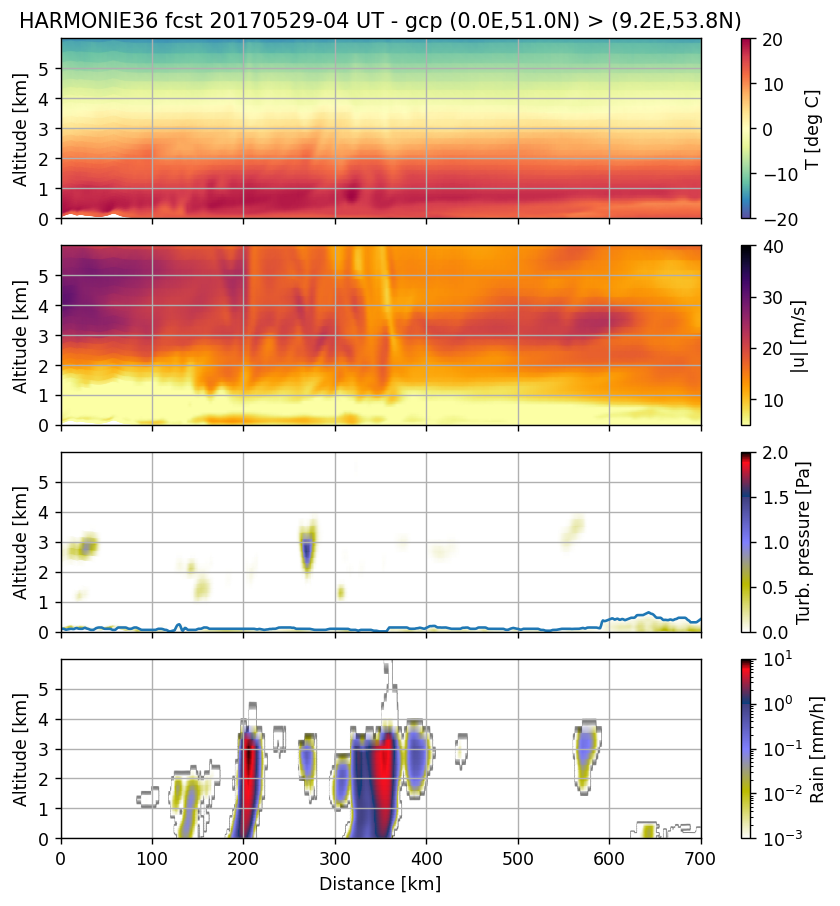

In [20]:
n_plots = 4
fig, ax = plt.subplots(n_plots, 1, sharex=True, figsize=(8,8))
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.9, wspace=0.15, hspace=0.15)

im = ax[0].pcolormesh(x, y, temperature,
             cmap='Spectral_r', shading='gouraud',
             vmin=temp_lim['min'], vmax=temp_lim['max'])
plt.colorbar(im,ax=ax[0],label='T [deg C]')

im = ax[1].pcolormesh(x, y, windspeed,
             cmap='inferno_r', shading='gouraud',
             vmin=wind_lim['min'], vmax=40.0)

plt.colorbar(im,ax=ax[1],label='|u| [m/s]')

im = ax[2].pcolormesh(x, y, ds_gcp['pres_turb'],
             cmap='gist_stern_r', shading='gouraud',
             vmin=0, vmax=2.0)
ax[2].plot(ds_gcp.distance / 1e3, ds_gcp.mld / 1e3)
plt.colorbar(im,ax=ax[2],label='Turb. pressure [Pa]')

rain = ds_gcp.rain
im = ax[3].pcolormesh(x, y, rain*5*3600,
             cmap='gist_stern_r', shading='gouraud',
             norm=colors.LogNorm(vmin=1e-3,vmax=10.0))
plt.colorbar(im,ax=ax[3],label='Rain [mm/h]')


for i in range(0,n_plots):
    ax[i].set_title('')
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Altitude [km]')
    ax[i].set_ylim(z_lim['min'], z_lim['max'])
    ax[i].set_yticks(np.arange(z_lim['min'], z_lim['max'], z_lim['dz']))
    ax[i].grid()

plt.tight_layout

ax[0].set_title(title_str)
ax[3].set_xlabel('Distance [km]')

plt.show()

fid = '{model}{cycle}_{time}_gcp_tuwp.png'.format(model=my_atmos.model, cycle=my_atmos.cycle, time=t_fcst)
fig.savefig(fid, facecolor='white', bbox_inches = 'tight')
fig.savefig('../'+fid, facecolor='white', bbox_inches = 'tight')

## Pressure-rain plot

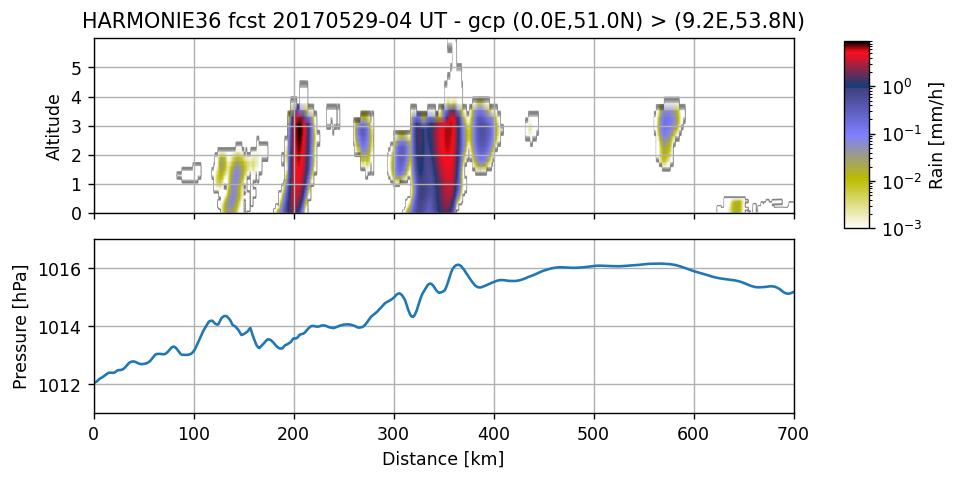

In [21]:
n_plots = 2
lev = 60

fig, ax = plt.subplots(n_plots, 1, sharex=True, figsize=(8,4))
fig.subplots_adjust(bottom=0.15, top=0.9, left=0.1, right=0.9, wspace=0.15, hspace=0.15)

rain = ds_gcp['rain']*5*3600
im = ax[0].pcolormesh(x, y, rain,
             cmap='gist_stern_r', shading='gouraud',
             norm=colors.LogNorm(vmin=1e-3,vmax=rain.max()))

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.52, 0.025, 0.375])
fig.colorbar(im, cax=cbar_ax, label='Rain [mm/h]')


ax[0].set_title('')
ax[0].set_ylabel('Altitude')
ax[0].set_ylim(z_lim['min'], z_lim['max'])
ax[0].set_yticks(np.arange(z_lim['min'], z_lim['max'], z_lim['dz']))
ax[0].set_xlabel('')

ax[1].plot(x[lev-1,:], ds_gcp['pres_msl'].values/1e2)
ax[1].set_ylabel('Pressure [hPa]')
ax[1].set_ylim(1011, 1017)

for i in range(0,n_plots):
    ax[i].grid()

lons = ds_gcp.longitude.values
lats = ds_gcp.latitude.values
coord_str = '({slo:.1f}E,{sla:.1f}N) > ({elo:.1f}E,{ela:.1f}N)'.format(
    slo=lons[0], sla=lats[0], elo=lons[-1], ela=lats[-1])
gcp_title_str = '{model}{cycle} fcst {time} UT - gcp {coords}'.format(
    model=my_atmos.model, cycle=my_atmos.cycle, time=t_fcst, coords=coord_str)


plt.tight_layout

ax[0].set_title(title_str)
ax[1].set_xlabel('Distance [km]')

plt.show()

fid = '{model}{cycle}_{time}_gcp_pressure_rain.png'.format(model=my_atmos.model, cycle=my_atmos.cycle, time=t_fcst)
fig.savefig(fid, facecolor='white', bbox_inches = 'tight')
fig.savefig('../'+fid, facecolor='white', bbox_inches = 'tight')

## Turbulence analysis

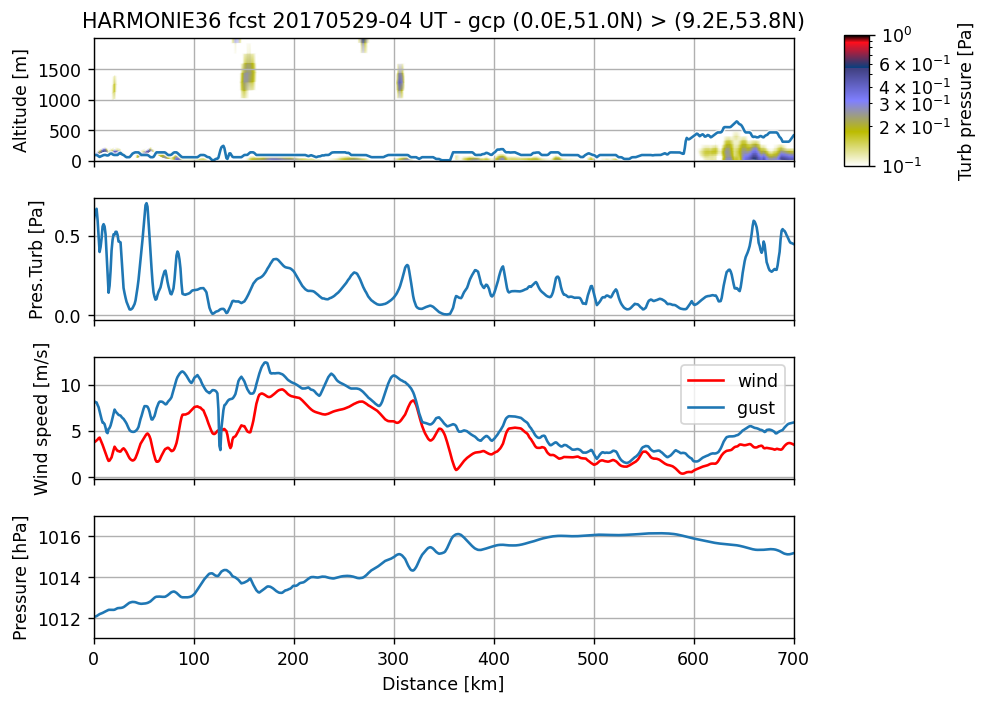

In [22]:
import matplotlib.patheffects as pe

n_plots = 4
lev = 60

fig, ax = plt.subplots(n_plots, 1, sharex=True, figsize=(8,6))
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.9, wspace=0.15, hspace=0.3)

im = ax[0].pcolormesh(x, y*1e3, ds_gcp['pres_turb'],
             cmap='gist_stern_r', shading='gouraud',
             norm=colors.LogNorm(vmin=0.1,vmax=1.0))

ax[0].plot(x[lev-1,:], ds_gcp['mld'], 
           path_effects=[pe.Stroke(linewidth=3, foreground='w', alpha=0.75), pe.Normal()])

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.73, 0.025, 0.175])
fig.colorbar(im, cax=cbar_ax, label='Turb pressure [Pa]')

z_lim['max'] = 2000.0
dz = 500.0

ax[0].set_title('')
ax[0].set_ylabel('Altitude [m]')
ax[0].set_ylim(z_lim['min'], z_lim['max'])
ax[0].set_yticks(np.arange(z_lim['min'], z_lim['max'], dz))
ax[0].set_xlabel('')

tke_gnd = ds_gcp['pres_turb'].sel(hybrid=lev)
ax[1].plot(x[lev-1,:], tke_gnd)
ax[1].set_ylabel('Pres.Turb [Pa]')

gust = np.sqrt(ds_gcp.ugst**2 + ds_gcp.vgst**2)
ws_gnd = windspeed.sel(hybrid=lev)
ax[2].plot(x[lev-1,:], ws_gnd, 'r', label='wind')
ax[2].plot(x[lev-1,:], gust, label='gust')
ax[2].set_ylabel('Wind speed [m/s]')
ax[2].legend()


ax[3].plot(x[lev-1,:], ds_gcp['pres_msl'].values/1e2)
ax[3].set_ylabel('Pressure [hPa]')
ax[3].set_ylim(1011, 1017)

for i in range(0,n_plots):
    ax[i].grid()

plt.tight_layout

ax[0].set_title(title_str)
ax[3].set_xlabel('Distance [km]')

plt.show()

fid = '{model}{cycle}_{time}_gcp_tke.png'.format(model=my_atmos.model, cycle=my_atmos.cycle, time=t_fcst)
fig.savefig(fid, facecolor='white', bbox_inches = 'tight')
fig.savefig('../'+fid, facecolor='white', bbox_inches = 'tight')